In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

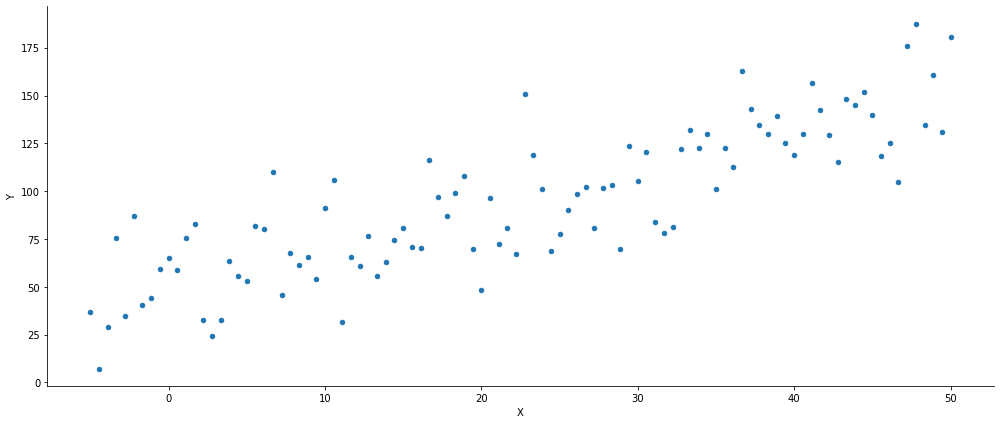

In [2]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

In [3]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     234.5
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           9.54e-28
Time:                        09:26:31   Log-Likelihood:                -445.31
No. Observations:                 100   AIC:                             894.6
Df Residuals:                      98   BIC:                             899.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3149      3.617     13.634      0.0

In [4]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const    49.314923
X         2.004846
dtype: float64

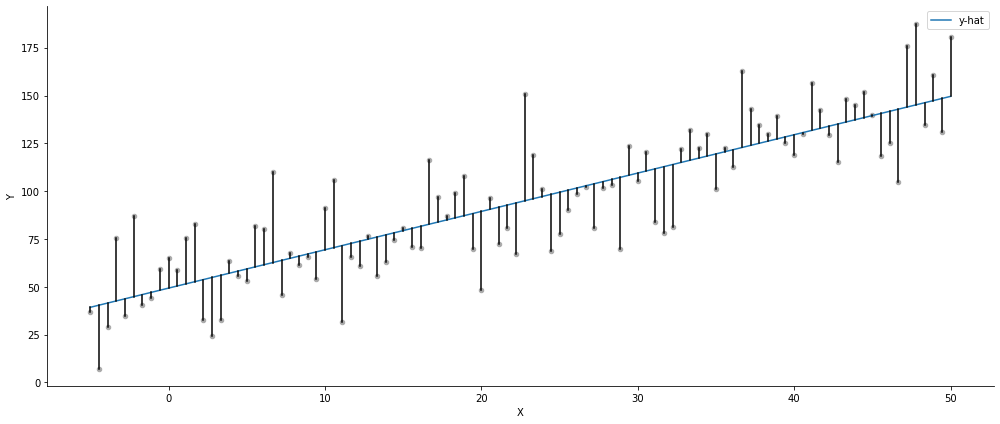

In [5]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

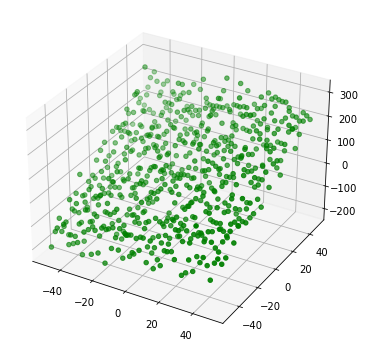

In [70]:
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout();

In [71]:
X = data[['X_1', 'X_2']]
y = data['Y']

In [72]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1141.
Date:                Fri, 05 Feb 2021   Prob (F-statistic):          6.92e-209
Time:                        10:09:28   Log-Likelihood:                -3342.7
No. Observations:                 625   AIC:                             6691.
Df Residuals:                     622   BIC:                             6705.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.5536      2.040     23.313      0.0

In [73]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const    47.553555
X_1       0.959195
X_2       3.098592
dtype: float64

In [74]:
data['y-hat'] = model.predict()

In [75]:
data

,X_1,X_2,Y,y-hat
0,-50.0,-50.000000,-199.232208,-155.335776
1,-50.0,-45.833333,-147.888169,-142.424976
2,-50.0,-41.666667,-106.018087,-129.514176
3,-50.0,-37.500000,-156.751184,-116.603376
4,-50.0,-33.333333,-209.012190,-103.692576
...,...,...,...,...
620,50.0,33.333333,129.632702,198.799686
621,50.0,37.500000,174.994812,211.710486
622,50.0,41.666667,216.610714,224.621286
623,50.0,45.833333,225.006542,237.532086


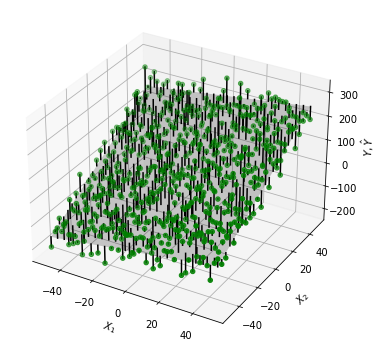

In [76]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

In [81]:
data

,X_1,X_2,Y,y-hat
0,-50.0,-50.000000,-199.232208,-155.335776
1,-50.0,-45.833333,-147.888169,-142.424976
2,-50.0,-41.666667,-106.018087,-129.514176
3,-50.0,-37.500000,-156.751184,-116.603376
4,-50.0,-33.333333,-209.012190,-103.692576
...,...,...,...,...
620,50.0,33.333333,129.632702,198.799686
621,50.0,37.500000,174.994812,211.710486
622,50.0,41.666667,216.610714,224.621286
623,50.0,45.833333,225.006542,237.532086


## Question

In [87]:
# to_plot.values()

In [68]:
type(to_plot)

pandas.core.frame.DataFrame